## Course 3: Regression Logistique
### Author: Ricardo Vallejo


- L’objectif de ces exercices est de pratiquer la régression logistique sur un
ensemble de données.

- Soit l’ensemble des données Iris qui comprend 150 observations de fleurs
d’iris décrites par la longueur et la largeur des sépales et des pétales. Trois espèces différentes sont incluses Iris setosa, Iris versicolor et Iris virginica

In [44]:
# https://www.kaggle.com/jamesdhope/logistic-regression-for-iris-classification
# https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc   

# 1.  Load Data

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

# 1. Téléchargez le contenu de la base de données iris

data = pd.read_csv("iris.csv")
pd.set_option('display.max_rows', None)
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 1.1.  Identify Classes et Features

In [46]:
fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics

In [47]:
cn = ['setosa', 'versicolor', 'virginica'] #Classes

### 1.2. Check the distribution or instances of any class


In [48]:
data.groupby('species').size()  #Class species ALL DATA

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## 2. Split data in Training Data and Test Data

We can split the dataset into a training set and a test set. Usually, we should also have a validation set

In [49]:
#Repartition des donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.5, stratify = data['species'], random_state = 10) #40% data for tests


In [50]:
train.groupby('species').size() #SPLITED DATA TRAINING

species
setosa        25
versicolor    25
virginica     25
dtype: int64

In [51]:
test.groupby('species').size() #SPLITED DATA TESTS

species
setosa        25
versicolor    25
virginica     25
dtype: int64

## 2. Creation de matrices des characteristiques - Virginica est la class BINARY

Affecter l’étiquette Y (variable cible) « 1 » aux observations dont la
classe est Iris virginica et l’étiquette « 0 » aux autres classes (Not Iris
virginica).

In [121]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics

X_train = train[['petal_width']] # train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['petal_width']] #test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test[['species']]

# create a new column based on condition
specieTarget = 'virginica'
Y_test['species'] = np.where(Y_test['species'] == specieTarget, 1, 0)
Y_train['species'] = np.where(Y_train['species'] == specieTarget, 1, 0)



<ipython-input-121-a06a642d009a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test['species'] = np.where(Y_test['species'] == specieTarget, 1, 0)
<ipython-input-121-a06a642d009a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train['species'] = np.where(Y_train['species'] == specieTarget, 1, 0)


In [122]:
X_train

,petal_width
12,0.1
99,1.3
7,0.2
136,2.4
86,1.5
104,2.2
101,1.9
145,2.3
97,1.3
27,0.2


In [123]:
Y_train

,species
12,0
99,0
7,0
136,1
86,0
104,1
101,1
145,1
97,0
27,0



## 3. . Représentez la dispersion de la variable Petal width en fonction de la variable cibleReprésentez la dispersion de la variable Petal width en fonction de Petal length

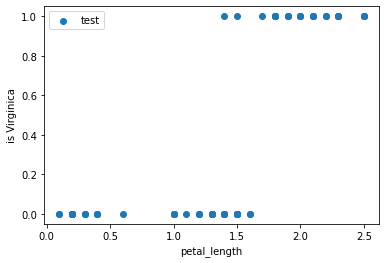

In [165]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_test [['petal_width']], Y_test [['species']], label='test')
plt.legend(loc='upper left');
plt.xlabel('petal_length')
plt.ylabel('is Virginica')
## 4. Représentez la dispersion de la variable Petal width en fonction de la variable cible
plt.show()


## 4. Représentez la dispersion de la variable Petal width en fonction de la variable cible


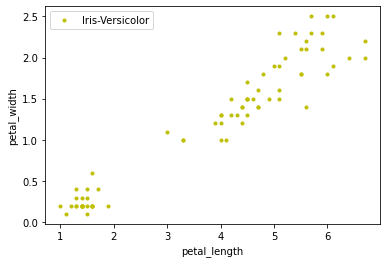

In [168]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.plot(test[['petal_length']], test [['petal_width']], "y.", label="Iris-Versicolor")

plt.legend(loc='upper left');
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

## 5. En considérant la variable Petal width, entrainez un modèle de régression logistique sur l’ensemble des données


In [173]:
from sklearn.linear_model import LogisticRegression


In [174]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [177]:
model.fit(X_train, np.array(Y_train).ravel())

LogisticRegression(random_state=0)

In [178]:
train_acc = model.score(np.array(X_train['petal_width']).reshape(-1,1), Y_train['species'])
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 94.66666666666667


## 5.1. Prediction

In [179]:
Y_pred=model.predict(X_test)

## 5.2. Evaluation de model

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[50  0]
 [ 2 23]]


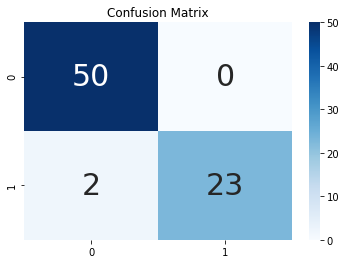

In [181]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [182]:
print(classification_report(Y_test, Y_pred) )

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.92      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.96      0.97        75
weighted avg       0.97      0.97      0.97        75



## 5.3.  Equations de model

In [147]:
model.coef_

array([[3.31261279]])

## 5.4. Frontieres de desicion

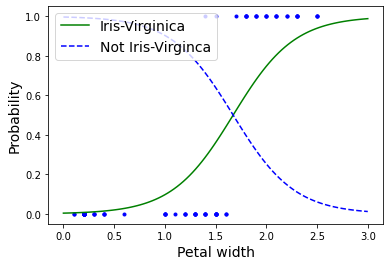

In [162]:
X_new = np.linspace(0,3,100).reshape(-1,1)
y_proba = model.predict_proba(X_new)

plt.plot(X_test['petal_width'], Y_test['species'],"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [152]:
y_proba  #column 0: 

array([[0.99609749, 0.00390251],
       [0.99608457, 0.00391543],
       [0.99607162, 0.00392838],
       ...,
       [0.90345727, 0.09654273],
       [0.90316766, 0.09683234],
       [0.90287728, 0.09712272]])